In [ ]:
# import libraries
import pandas as pd
import numpy as np
#import shap
import plotly.express as px
from pycaret.classification import *

In [ ]:
url = 'https://raw.githubusercontent.com/shardul1704/Lead-Score-Prediction/main/Data/Leads.csv'
data = pd.read_csv(url)

In [ ]:
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [ ]:
# check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
data2 = data.copy()
data2.dropna(axis=0, inplace=True)
data2['Converted'] = data2['Converted'].replace({1 : 'Yes', 0 : 'No'})

fig = px.scatter(x=data2['Total Time Spent on Website'], y=data2['Asymmetrique Activity Score'],
                 color = data2['Converted'], template = 'plotly_white',
                 facet_col = data2['Lead Origin'], facet_row = data2['Do Not Email'],
                 title = 'Lead Conversion by Total time spent on Website, Activity Score and Lead Origin',
                 labels = {'x' : 'Total Time Spent on Website', 'y' : 'Activity Score'})

fig.show()

In [ ]:
# init setup
s = setup(data, target = 'Converted', ignore_features = ['Prospect ID', 'Lead Number'])

,Description,Value
0,Session id,994
1,Target,Converted
2,Target type,Binary
3,Original data shape,"(9240, 37)"
4,Transformed data shape,"(9240, 132)"
5,Transformed train set shape,"(6468, 132)"
6,Transformed test set shape,"(2772, 132)"
7,Ignore features,2
8,Ordinal features,8
9,Numeric features,5


In [ ]:
# compare all models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9344,0.9798,0.9110,0.9189,0.9146,0.8614,0.8619,7.4560
lightgbm,Light Gradient Boosting Machine,0.9344,0.9785,0.9110,0.9191,0.9147,0.8615,0.8619,1.4330
gbc,Gradient Boosting Classifier,0.9298,0.9773,0.9005,0.9164,0.9082,0.8514,0.8517,3.1200
xgboost,Extreme Gradient Boosting,0.9327,0.9771,0.9086,0.9171,0.9125,0.8579,0.8583,5.4430
rf,Random Forest Classifier,0.9278,0.9748,0.8901,0.9204,0.9048,0.8467,0.8472,2.5050
lr,Logistic Regression,0.9233,0.9717,0.8889,0.9104,0.8994,0.8375,0.8378,4.5600
ada,Ada Boost Classifier,0.9208,0.9715,0.8837,0.9090,0.8959,0.8321,0.8326,1.8080
lda,Linear Discriminant Analysis,0.9178,0.9684,0.8716,0.9115,0.8909,0.8250,0.8257,1.0450
et,Extra Trees Classifier,0.9184,0.9680,0.8713,0.9133,0.8916,0.8262,0.8270,2.6250
dt,Decision Tree Classifier,0.9011,0.8979,0.8741,0.8706,0.8720,0.7914,0.7918,0.9160


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# except for catboost you can do this:
print(best_model)

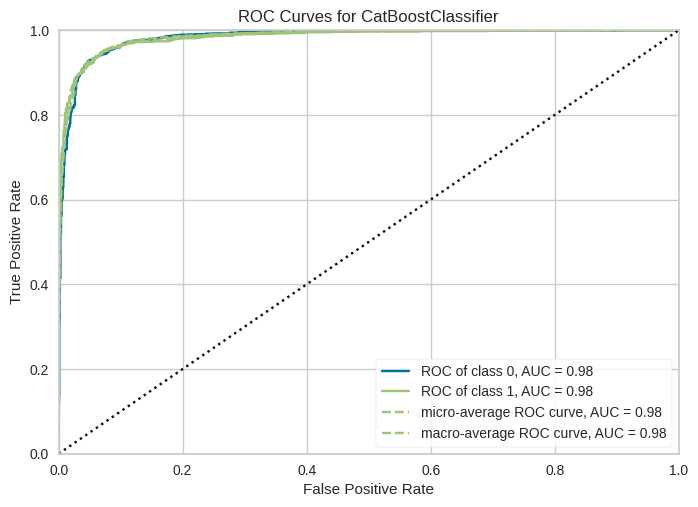

In [ ]:
# AUC Plot
plot_model(best_model, plot = 'auc')

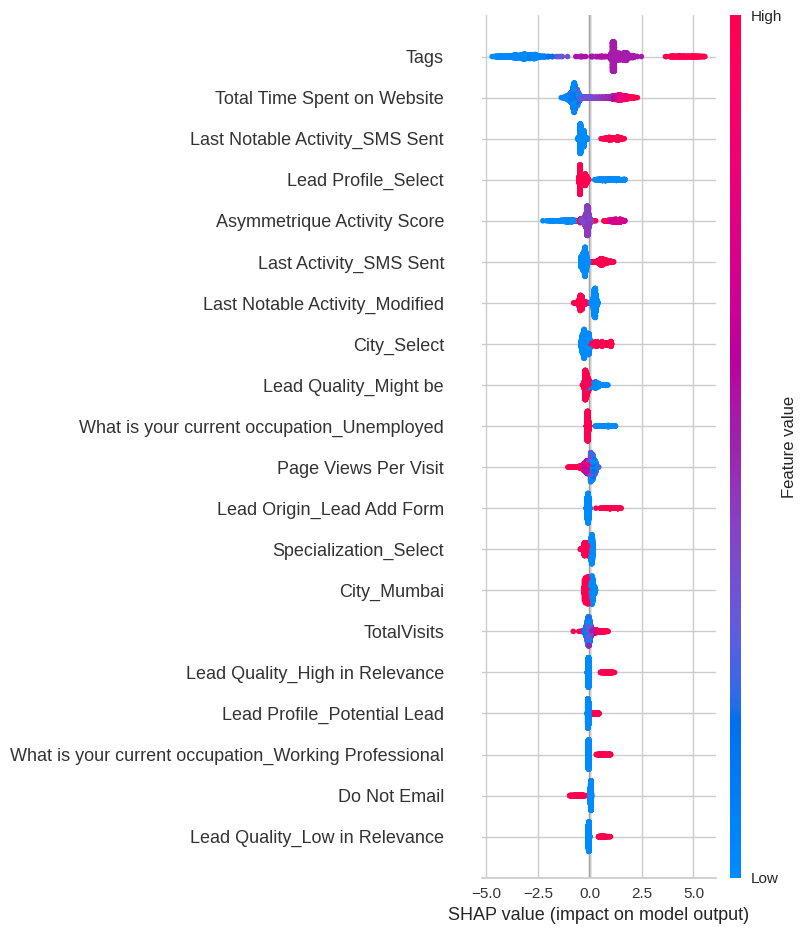

In [ ]:
# Shapley Values
interpret_model(best_model)

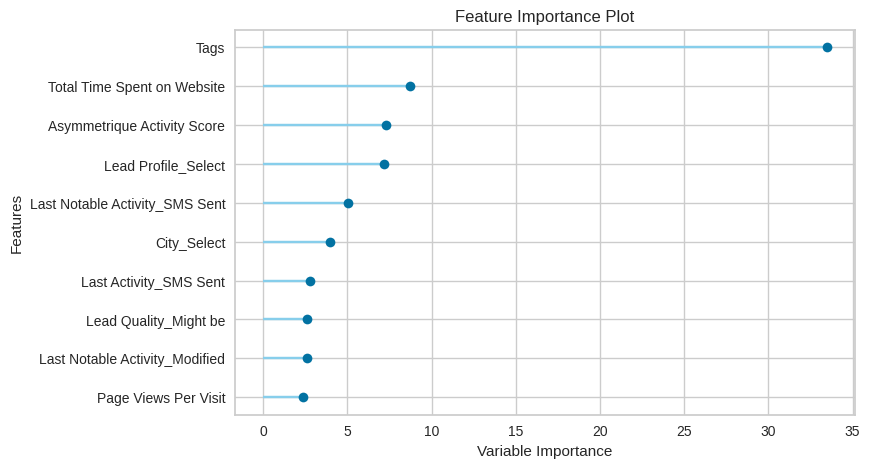

In [ ]:
# Feature Importance
plot_model(best_model, plot = 'feature')

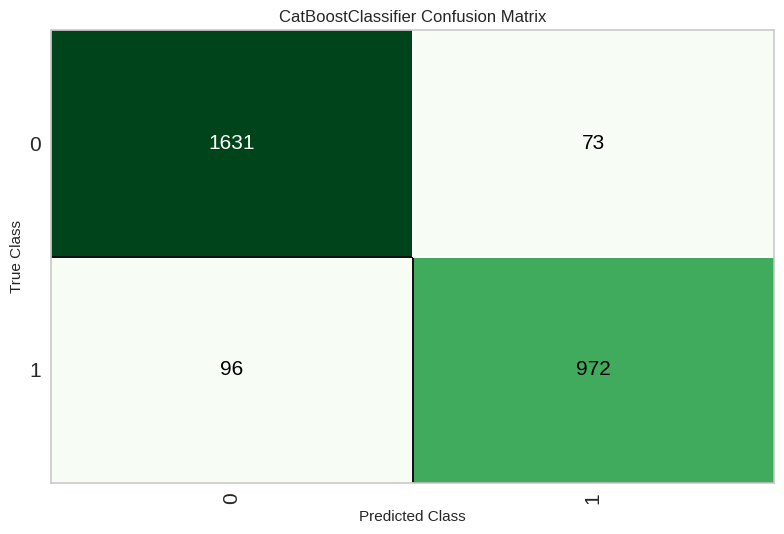

In [ ]:
# Confusion Matrix
plot_model(best_model, plot = 'confusion_matrix')

In [ ]:
# create a custom function
def calculate_profit(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (120-15), 0)
    fp = np.where((y_pred==1) & (y==0), -15, 0)
    fn = np.where((y_pred==0) & (y==1), -120, 0)
    return np.sum([tp,fp,fn])# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                        Profit
Display Name                                                Profit
Score Function       <function calculate_profit at 0x7f0ec54d2b90>
Scorer                               make_scorer(calculate_profit)
Target                                                        pred
Args                                                            {}
Greater is Better                                             True
Multiclass                                                    True
Custom                                                        True
Name: profit, dtype: object

In [ ]:
# compare all models
best_model = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9344,0.9785,0.9110,0.9191,0.9147,0.8615,0.8619,20878.5000,0.6580
catboost,CatBoost Classifier,0.9344,0.9798,0.9110,0.9189,0.9146,0.8614,0.8619,20878.5000,0.5250
xgboost,Extreme Gradient Boosting,0.9327,0.9771,0.9086,0.9171,0.9125,0.8579,0.8583,20736.0000,0.7860
gbc,Gradient Boosting Classifier,0.9298,0.9773,0.9005,0.9164,0.9082,0.8514,0.8517,20287.5000,1.5260
rf,Random Forest Classifier,0.9278,0.9748,0.8901,0.9204,0.9048,0.8467,0.8472,19722.0000,1.2420
lr,Logistic Regression,0.9233,0.9717,0.8889,0.9104,0.8994,0.8375,0.8378,19615.5000,1.9100
ada,Ada Boost Classifier,0.9208,0.9715,0.8837,0.9090,0.8959,0.8321,0.8326,19318.5000,0.5110
lda,Linear Discriminant Analysis,0.9178,0.9684,0.8716,0.9115,0.8909,0.8250,0.8257,18658.5000,0.4010
et,Extra Trees Classifier,0.9184,0.9680,0.8713,0.9133,0.8916,0.8262,0.8270,18643.5000,0.7720
dt,Decision Tree Classifier,0.9011,0.8979,0.8741,0.8706,0.8720,0.7914,0.7918,18622.5000,0.8940


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

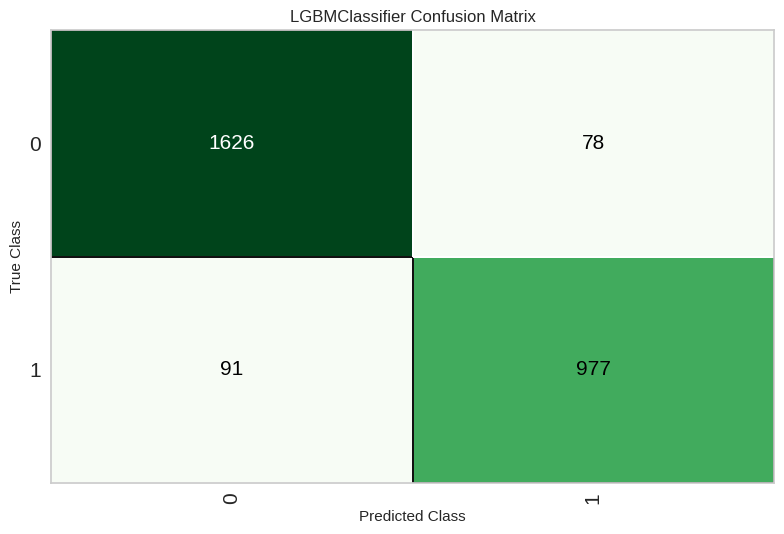

In [ ]:
# confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

In [ ]:
# create copy of data
data_new = data.copy()
data_new.drop('Converted', axis=1, inplace=True)# generate labels using predict_model
predict_model(best_model, data=data_new, raw_score=True)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,prediction_label,prediction_score_0,prediction_score_1
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.00,Page Visited on Website,...,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0,0.9985,0.0015
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.50,Email Opened,...,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0,0.9255,0.0745
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.00,Email Opened,...,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1,0.0033,0.9967
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.00,Unreachable,...,02.Medium,01.High,13.0,17.0,No,No,Modified,0,0.9977,0.0023
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.00,Converted to Lead,...,02.Medium,01.High,15.0,18.0,No,No,Modified,1,0.4048,0.5952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,8.0,1845,2.67,Email Marked Spam,...,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam,1,0.0152,0.9848
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,2.0,238,2.00,SMS Sent,...,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent,0,0.9938,0.0062
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,2.0,199,2.00,SMS Sent,...,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent,0,0.9981,0.0019
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,3.0,499,3.00,SMS Sent,...,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent,1,0.0269,0.9731


In [ ]:
save_model(best_model, model_name = 'Lead_score_lightgbm_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['TotalVisits',
                                              'Total Time Spent on Website',
                                              'Page Views Per Visit',
                                              'Asymmetrique Activity Score',
                                              'Asymmetrique Profile Score'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
          

In [ ]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/shardul1704/Lead-Score-Prediction/main/Data/Leads.csv'
data = pd.read_csv(url)

In [ ]:
data['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)